In [1]:
import os

import cv2
import pyvips
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.join("..", "data", "images")
image_names = os.listdir(data_dir)

print("num images:", len(image_names))

num images: 127


In [3]:
image_paths = [os.path.join(data_dir, i) for i in image_names]

images = [pyvips.Image.new_from_file(f, access="sequential") for f in image_paths]

In [4]:
smallest_image = images[image_names.index("11000.ome.tif")]

smallest_image = smallest_image.numpy()

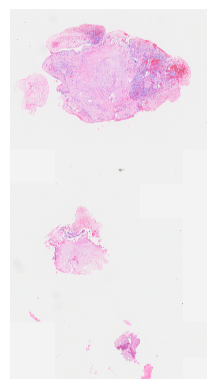

In [5]:
plt.imshow(smallest_image)
plt.axis("off")
plt.show()

In [6]:
kernel_shape = (31, 31)
gray = cv2.cvtColor(smallest_image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)
binary = cv2.GaussianBlur(binary, kernel_shape, 0)

# kernel = np.ones(kernel_shape, np.uint8)
# binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=8)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = [c for c in contours if cv2.contourArea(c) > 2_000_000]

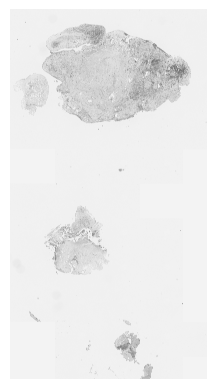

In [7]:
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

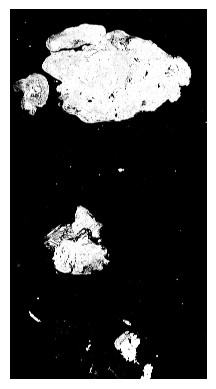

In [8]:
plt.imshow(binary, cmap="gray")
plt.axis("off")
plt.show()

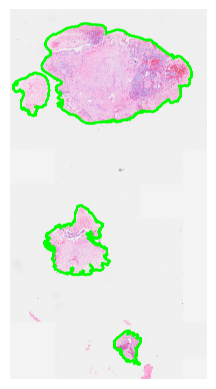

In [9]:
contoured = cv2.drawContours(smallest_image, contours, -1, (0, 255, 0), 200)

plt.imshow(contoured)
plt.axis("off")
plt.show()